Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

Визуализируйте продажи по дням.

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [1]:
import pandas as pd
import os

os.getcwd()

'/Users/turba/Documents/DA/Pandas 4 lesson'

In [6]:
os.listdir('/Users/turba/Documents/DA/Pandas 4 lesson/data')
path = '/Users/turba/Documents/DA/Pandas 4 lesson/data'

In [8]:
list(os.walk(path))

[('/Users/turba/Documents/DA/Pandas 4 lesson/data',
  ['2020-12-06',
   '2020-12-08',
   '2020-12-09',
   '2020-12-07',
   '2020-12-05',
   '2020-12-03',
   '2020-12-04'],
  ['.DS_Store']),
 ('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-06',
  ['Vasiliy_Fedorov'],
  []),
 ('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-06/Vasiliy_Fedorov',
  [],
  ['data.csv']),
 ('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-08',
  ['Alexey_Fedorov',
   'Anton_Smirnov',
   'Kirill_Smirnov',
   'Rostislav_Petrov',
   'Petr_Petrov'],
  []),
 ('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-08/Alexey_Fedorov',
  [],
  ['data.csv']),
 ('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-08/Anton_Smirnov',
  [],
  ['data.csv']),
 ('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-08/Kirill_Smirnov',
  [],
  ['data.csv']),
 ('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-08/Rostislav_Petrov',
  [],
  ['data.csv']),
 ('/Users/turba/Documents/DA/Pandas 

In [11]:
for i in os.walk(path):
    print(i)
    #break

('/Users/turba/Documents/DA/Pandas 4 lesson/data', ['2020-12-06', '2020-12-08', '2020-12-09', '2020-12-07', '2020-12-05', '2020-12-03', '2020-12-04'], ['.DS_Store'])
('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-06', ['Vasiliy_Fedorov'], [])
('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-06/Vasiliy_Fedorov', [], ['data.csv'])
('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-08', ['Alexey_Fedorov', 'Anton_Smirnov', 'Kirill_Smirnov', 'Rostislav_Petrov', 'Petr_Petrov'], [])
('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-08/Alexey_Fedorov', [], ['data.csv'])
('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-08/Anton_Smirnov', [], ['data.csv'])
('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-08/Kirill_Smirnov', [], ['data.csv'])
('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-08/Rostislav_Petrov', [], ['data.csv'])
('/Users/turba/Documents/DA/Pandas 4 lesson/data/2020-12-08/Petr_Petrov', [], ['data.csv'])
('/Users/turba/Documen

In [47]:
df = pd.DataFrame()
for current_path, dirs, files in  os.walk(path):
    #print('current_path:', current_path)
    #print('dirs: ', dirs)
    for file in files:
        if file == '.DS_Store':
            continue
        path_parts = current_path.split('/')
        date = path_parts[-2]
        name = path_parts[-1]
    
        #print('current_path:', current_path)
        #print('dirs: ', dirs)
        #print('file: ', file)
        data_path = f'{current_path}/{file}'
        temp_df = pd.read_csv(data_path, encoding='iso8859')
        temp_df['date'] = date
        temp_df['name'] = name
        df = pd.concat((df,temp_df), axis=0)
        

    

In [65]:
df = df.drop(columns='Unnamed: 0')
df = df.reindex(columns = ['name', 'product_id', 'quantity','date']).reset_index(drop=True)

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [66]:
df

,name,product_id,quantity,date
0,Vasiliy_Fedorov,56,4,2020-12-06
1,Vasiliy_Fedorov,97,3,2020-12-06
2,Vasiliy_Fedorov,79,3,2020-12-06
3,Vasiliy_Fedorov,29,5,2020-12-06
4,Alexey_Fedorov,73,5,2020-12-08
...,...,...,...,...
156,Kirill_Fedorov,3,4,2020-12-04
157,Kirill_Fedorov,89,5,2020-12-04
158,Kirill_Fedorov,75,2,2020-12-04
159,Kirill_Fedorov,41,5,2020-12-04


In [74]:
df.groupby('name', as_index=False).agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?


In [84]:
top_10_products = df.groupby('product_id', as_index=False).aggregate({'quantity': 'sum'}).sort_values(by='quantity', ascending=False).head(10)

<Axes: xlabel='product_id', ylabel='quantity'>

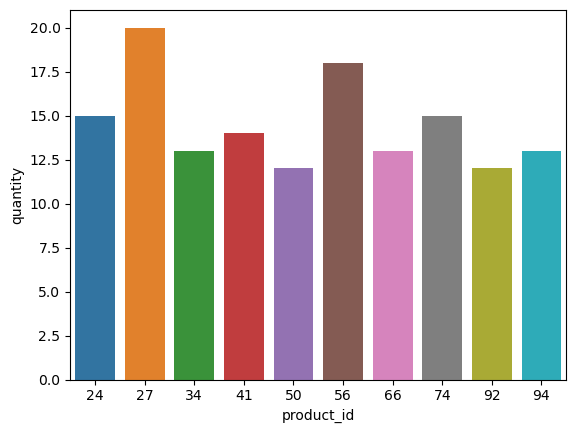

In [85]:
import seaborn as sns
sns.barplot(data=top_10_products, x='product_id', y='quantity')

Визуализируйте продажи по дням.

<Axes: xlabel='date'>

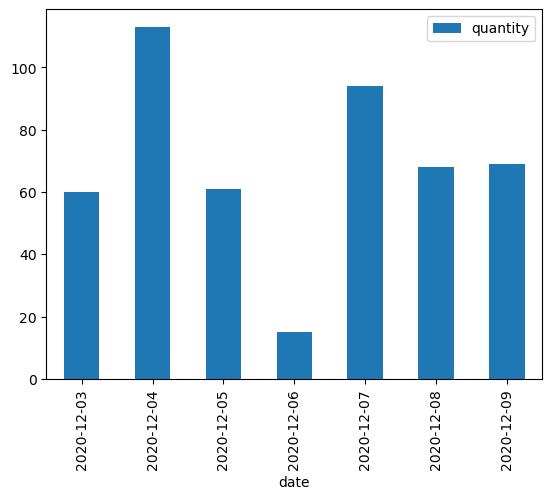

In [87]:
df.groupby('date').aggregate({'quantity' : 'sum'}).plot(kind='bar')

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [94]:
df.groupby(['name', 'product_id'], as_index=False).aggregate({'date': pd.Series.nunique}).query('date > 1')

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
